# Soccer Player Position Prediction

## DEFINE

This project examines attributes which soccer players need to have in order to play at specific positions on the pitch. Using physical, mental, and technical attributes, as well as variables such as financial information or jersey number, I will build a model that will clasify a player to a position based on the aforementioned features. The dataset used to tackle this problem is the "FIFA 20 complete player dataset" (publicly available at https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset). This video game uses real players and uses scouts around the globe to assess players' attributes as accurately as possible.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

__author__ = "Lukas Barbuscak"
__email__ = "lukas.barbuscak@gmail.com"

## DISCOVER

In [2]:
#loading the data
df = pd.read_csv("data\\data.csv")
df = shuffle(df)

#examining the dataset
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
12983,201932,https://sofifa.com/player/201932/dong-woo-kim/...,Kim Dong Woo,김동우 金东佑,31,1988-02-05,189,87,Korea Republic,Jeju United FC,...,56+2,56+2,56+2,56+2,56+2,57+2,62+2,62+2,62+2,57+2
11033,242641,https://sofifa.com/player/242641/rayan-ait-nou...,R. Aït Nouri,Rayan Aït Nouri,18,2001-06-06,179,70,France,Angers SCO,...,62+2,60+2,60+2,60+2,62+2,63+2,60+2,60+2,60+2,63+2
16413,243178,https://sofifa.com/player/243178/barry-maguire...,B. Maguire,Barry Maguire,21,1998-04-27,189,77,Scotland,Motherwell,...,47+2,47+2,47+2,47+2,47+2,50+2,55+2,55+2,55+2,50+2
1375,222715,https://sofifa.com/player/222715/otavio-henriq...,Otávio,Otávio Henrique Passos Santos,25,1994-05-04,176,73,Brazil,FC Girondins de Bordeaux,...,73+2,74+2,74+2,74+2,73+2,73+2,75+2,75+2,75+2,73+2
5848,237420,https://sofifa.com/player/237420/vasilije-janj...,V. Janjičić,Vasilije Janjičić,20,1998-11-02,180,82,Switzerland,Hamburger SV,...,65+2,68+2,68+2,68+2,65+2,65+2,67+2,67+2,67+2,65+2


### Cleaning the dataset

In [3]:
#examining the columns
for col in df.columns: 
    print(col) 

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

The only columns that I need are the ones that might have an impact on a player's played position. Therefore, I can get rid of several columns that are irrelevant for this type of analysis, and would only be redundant in the models. I will explain some of the less obvious ones:
- "club", "loaned_from", "joined": every club needs roughly the same ratio of all of the positions
- "overall", "potential", "player_tags", "player_traits": these ratings are an arbitrary measure of players picked up by other abilities
- "nation_position", "nation_jersey_number", "release_clause_eur" and all position rating variables: lots of missing values, interpolation would make data unreliable + information on financial, and position data is available in other columns
- "gk", "pace", "shooting", "passing", "dribbling", "defending", "physic": duplicate columns

In [4]:
#dropping irrelevant columns
df.drop(["sofifa_id","player_url","short_name","long_name","dob","club","overall","potential","real_face",
         "international_reputation","player_tags","loaned_from","joined","contract_valid_until","nation_position",
         "nation_jersey_number","player_traits","ls","st","rs","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm",
         "cm","rcm","rm", "lwb","ldm","cdm","rdm","rwb","lb","lcb","cb","rcb","rb","gk_diving","gk_handling",
         "gk_reflexes", "gk_speed","gk_positioning","gk_kicking","team_position","pace", "shooting", "passing",
         "dribbling", "defending", "physic", "release_clause_eur"], axis = 1, inplace=True)

In [5]:
#inspecting the data
pd.set_option('display.max_columns', 100) 
df.head(15)

,age,height_cm,weight_kg,nationality,value_eur,wage_eur,player_positions,preferred_foot,weak_foot,skill_moves,work_rate,body_type,team_jersey_number,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
12983,31,189,87,Korea Republic,270000,1000,CB,Right,3,2,Medium/Medium,Normal,36.0,42,28,64,47,24,47,33,33,34,52,42,64,64,55,38,40,69,71,75,44,66,59,34,64,31,55,60,64,63,15,10,12,14,15
11033,18,179,70,France,850000,1000,LB,Left,3,2,Medium/Medium,Lean,2.0,65,40,59,64,36,62,48,38,53,67,66,69,73,56,77,43,56,54,43,41,59,62,58,54,40,58,58,66,67,15,11,8,14,12
16413,21,189,77,Scotland,210000,1000,CB,Right,3,2,Medium/Medium,Normal,15.0,30,20,55,32,26,25,28,24,30,32,55,54,40,48,60,42,65,60,66,23,57,55,21,34,41,45,57,61,59,7,7,13,11,15
1375,25,176,73,Brazil,8500000,26000,CDM,Right,3,3,Medium/High,Normal,5.0,59,44,64,75,49,69,47,49,69,72,67,65,72,73,70,66,74,78,72,52,80,80,59,53,48,74,78,80,75,8,10,15,12,9
5848,20,180,82,Switzerland,1400000,5000,"CDM, CM",Right,3,2,Medium/Medium,Normal,40.0,50,38,59,72,47,62,45,43,65,69,66,64,73,61,75,63,61,75,76,48,76,64,51,58,54,58,68,72,65,10,11,9,11,13
4998,23,181,74,Switzerland,2300000,3000,"CM, CDM",Right,4,3,Medium/Medium,Lean,11.0,64,52,59,75,50,69,60,57,70,71,75,79,84,69,82,67,67,76,62,61,66,61,59,71,55,66,64,63,62,10,15,7,6,9
13876,30,188,84,Bulgaria,0,0,CB,Right,3,2,Medium/High,Normal,NaN,28,15,61,51,25,47,22,24,44,59,63,62,47,49,58,36,71,54,73,17,46,62,27,30,37,43,62,64,62,8,13,12,7,12
7563,35,168,72,Chile,375000,2000,CM,Right,4,3,Medium/Medium,Normal,21.0,67,54,56,74,58,62,70,77,71,71,48,64,60,62,73,74,40,64,52,72,61,62,59,67,74,64,53,63,58,9,7,11,13,13
9247,27,182,74,Uruguay,575000,1000,GK,Right,3,1,Medium/Medium,Normal,1.0,17,16,16,23,20,12,14,11,16,22,50,47,38,61,52,47,60,40,39,18,27,16,15,32,24,30,11,12,12,65,66,63,64,66
6889,23,183,76,Iran,1100000,9000,CB,Right,3,2,Medium/Medium,Stocky,5.0,28,18,68,61,22,42,35,37,54,54,63,66,48,68,68,45,67,64,73,30,50,71,24,29,40,68,66,73,70,6,13,12,12,13


On the first sight, there are multiple issues with the data:
- multiple players positions listed: I will take only the first position listed, because it is the player's primary position
- "work_rate" needs to be split to two columns, each indicates the player's attacking/defensive workrate
- "body_type" should have only 3 types, but there are more
- there are some missing values across the sample

In [6]:
#splitting the positions column and deleting unnecessary secondary positions
df = pd.concat([df, df["player_positions"].str.split(', ', expand=True)], axis=1)
df.drop(['player_positions'], axis = 1, inplace=True) 
df.drop(df.columns[[-1, -2]], axis = 1, inplace=True)

#renaming the position column
df.set_axis([*df.columns[:-1], 'position'], axis=1, inplace=True)

#splitting the work_rate column
df[['att_work_rate','def_work_rate']] = df.work_rate.str.split("/",expand=True)
df.drop(['work_rate'], axis = 1, inplace=True)

In [7]:
#checking the body type values
df["body_type"].unique()

array(['Normal', 'Lean', 'Stocky', 'Courtois', 'Neymar',
       'PLAYER_BODY_TYPE_25', 'C. Ronaldo', 'Akinfenwa', 'Messi',
       'Shaqiri'], dtype=object)

Because the game uses special body type names for some players, I have to replace these unique values for it to accurately represent the dataset/real-life. I will use the mode to replace these values.

In [8]:
df["body_type"].mode()

0    Normal
dtype: object

In [9]:
#replacing the irregular values by the mode
df.body_type = df.body_type.replace({'PLAYER_BODY_TYPE_25':'Normal','Akinfenwa':'Normal','Neymar':"Normal",
                                     'Shaqiri':"Normal",'C. Ronaldo':"Normal",'Messi':"Normal","Courtois":"Normal"})

In [10]:
#checking missing values
df.isnull().sum()

age                             0
height_cm                       0
weight_kg                       0
nationality                     0
value_eur                       0
wage_eur                        0
preferred_foot                  0
weak_foot                       0
skill_moves                     0
body_type                       0
team_jersey_number            240
attacking_crossing              0
attacking_finishing             0
attacking_heading_accuracy      0
attacking_short_passing         0
attacking_volleys               0
skill_dribbling                 0
skill_curve                     0
skill_fk_accuracy               0
skill_long_passing              0
skill_ball_control              0
movement_acceleration           0
movement_sprint_speed           0
movement_agility                0
movement_reactions              0
movement_balance                0
power_shot_power                0
power_jumping                   0
power_stamina                   0
power_strength

In [11]:
df[df["team_jersey_number"].isnull()]

,age,height_cm,weight_kg,nationality,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,body_type,team_jersey_number,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position,att_work_rate,def_work_rate
13876,30,188,84,Bulgaria,0,0,Right,3,2,Normal,NaN,28,15,61,51,25,47,22,24,44,59,63,62,47,49,58,36,71,54,73,17,46,62,27,30,37,43,62,64,62,8,13,12,7,12,CB,Medium,High
6052,27,189,84,Egypt,0,0,Right,3,3,Normal,NaN,44,25,73,66,31,63,48,30,63,65,52,51,60,72,50,50,48,76,85,39,71,71,47,61,39,71,71,64,67,9,13,14,13,6,CDM,Low,High
8416,31,183,73,South Africa,0,0,Right,3,3,Normal,NaN,58,60,36,67,58,65,49,57,68,67,68,69,71,59,66,72,72,91,72,69,83,48,41,72,44,65,70,69,68,9,11,16,6,10,CM,Medium,High
4583,29,182,79,Hungary,0,0,Right,4,3,Lean,NaN,70,66,69,69,67,70,72,77,53,71,84,80,74,68,69,71,81,72,68,69,62,25,72,67,63,73,34,28,18,15,13,9,11,10,RW,Medium,Medium
7133,28,194,85,Hungary,0,0,Right,2,1,Normal,NaN,13,20,10,32,16,17,14,14,33,21,53,43,65,60,55,47,75,35,65,16,45,22,11,13,33,56,17,15,14,67,63,62,70,75,GK,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6560,29,170,68,Venezuela,0,0,Right,3,2,Lean,NaN,45,22,64,68,17,59,50,51,70,60,69,66,66,64,80,61,69,82,59,49,68,74,44,65,55,71,72,66,67,12,9,9,8,7,CDM,Medium,Medium
1252,27,187,85,Uruguay,0,0,Right,3,3,Normal,NaN,71,56,62,75,45,72,81,77,77,71,72,72,51,81,55,73,61,76,88,72,77,76,52,72,67,67,77,76,76,11,15,8,7,7,CDM,High,High
6561,30,185,79,Paraguay,0,0,Right,3,1,Normal,NaN,12,17,16,25,13,16,15,14,23,20,46,46,36,63,51,48,73,33,80,19,24,23,15,25,22,35,15,15,19,75,62,64,66,72,GK,Medium,Medium
991,35,174,71,Uruguay,0,0,Left,5,4,Normal,NaN,74,73,45,75,77,75,86,74,75,76,87,74,86,82,83,74,58,75,57,68,42,32,78,79,73,84,20,28,21,8,15,15,13,8,CAM,High,Medium


From the closer inspection of the rows, we can see that the players who do not have a number also have "value_eur" and "wage_eur" set to 0. This means they are players currently without a club, and can sign with any club for free. Let's check the boxplots if they can be considered outliers.

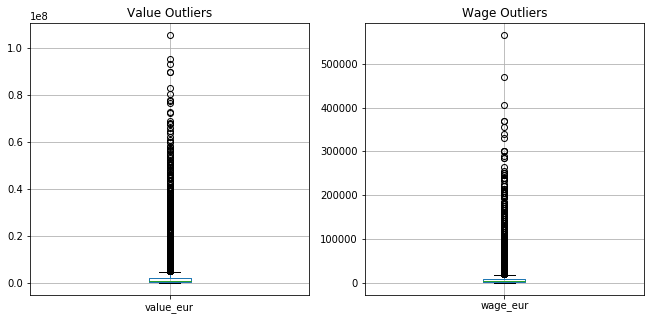

In [12]:
#creating boxplots
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
plt.title("Value Outliers")
df.boxplot(column=["value_eur"],)

plt.subplot(1,2,2)
plt.title("Wage Outliers")
df.boxplot(column=["wage_eur"])

plt.show()

Both boxplots show the players are not outliers, and they should not be removed from the dataset. I will therefore impute a value "0" to the player numbers, since there are no other values that are not imputed set to 0, and therefore it won't interfere with this classification problem.

In [13]:
#setting missing values to 0
df = df.fillna(0)

In [14]:
#checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18278 entries, 12983 to 1810
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         18278 non-null  int64  
 1   height_cm                   18278 non-null  int64  
 2   weight_kg                   18278 non-null  int64  
 3   nationality                 18278 non-null  object 
 4   value_eur                   18278 non-null  int64  
 5   wage_eur                    18278 non-null  int64  
 6   preferred_foot              18278 non-null  object 
 7   weak_foot                   18278 non-null  int64  
 8   skill_moves                 18278 non-null  int64  
 9   body_type                   18278 non-null  object 
 10  team_jersey_number          18278 non-null  float64
 11  attacking_crossing          18278 non-null  int64  
 12  attacking_finishing         18278 non-null  int64  
 13  attacking_heading_accuracy  

In [15]:
#converting dtypes to their correct value
df['team_jersey_number'] = df['team_jersey_number'].apply(np.int64)

Now the data is clean, I can move to EDA.

### Exploratory Data Analysis

In [16]:
df.describe()

,age,height_cm,weight_kg,value_eur,wage_eur,weak_foot,skill_moves,team_jersey_number,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,2.484038e+06,9456.942773,2.944250,2.368038,19.839917,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,4.656964,6.756961,7.047744,5.585481e+06,21351.714095,0.664656,0.765038,16.652277,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,16.000000,156.000000,50.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,177.000000,70.000000,3.250000e+05,1000.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,7.000000e+05,3000.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,2.100000e+06,8000.000000,3.000000,3.000000,27.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,42.000000,205.000000,110.000000,1.055000e+08,565000.000000,5.000000,5.000000,99.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.0000

In [17]:
#checking the differences between groups
position_summary=df.groupby("position")
position_summary.mean()

,age,height_cm,weight_kg,value_eur,wage_eur,weak_foot,skill_moves,team_jersey_number,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CAM,24.578534,176.585515,70.520942,3.390702e+06,10641.361257,3.221640,2.979058,20.517452,59.995637,59.112565,48.403141,67.664049,55.332461,68.446771,61.816754,58.363874,62.620419,68.549738,70.518325,69.034031,73.202443,62.013089,73.864747,63.831588,59.546248,62.612565,55.597731,59.762653,50.754799,38.726003,62.010471,66.070681,58.029668,63.290576,40.275742,41.363002,39.278360,10.418848,10.499127,10.505236,10.381326,10.382199
CB,25.848830,186.401961,79.719165,2.350177e+06,9293.801392,2.780519,2.026249,16.825427,40.426945,30.521822,65.601202,57.440860,32.027830,44.531309,36.104364,34.078115,52.040797,53.623340,56.460784,58.295383,52.918406,60.907653,54.639152,49.458887,70.761543,64.043643,75.838710,34.024984,66.824794,64.586022,35.019924,41.486401,41.304870,58.490196,65.006325,67.528779,65.235610,10.512018,10.509171,10.504744,10.562302,10.461101
CDM,25.880618,180.785815,74.870084,2.557640e+06,9735.252809,2.976826,2.352528,18.690309,52.584972,45.547753,58.321629,68.321629,44.172051,60.513343,50.369382,48.204354,65.036517,65.250000,61.892556,61.384129,64.075140,64.356039,65.522472,62.119382,66.922753,72.350421,69.632022,53.483146,69.900281,65.816713,52.143961,60.096910,50.634129,62.392556,64.672753,66.879213,63.929073,10.429073,10.518258,10.587079,10.690309,10.508427
CF,25.433628,177.884956,72.044248,7.871504e+06,28646.017699,3.345133,3.123894,19.230088,59.132743,67.654867,55.982301,67.796460,61.707965,71.699115,62.513274,56.141593,58.460177,71.283186,73.991150,72.407080,75.000000,66.973451,72.823009,67.185841,63.911504,65.823009,60.840708,64.088496,53.168142,33.893805,68.530973,67.008850,61.752212,65.893805,35.477876,33.876106,29.716814,10.079646,10.424779,10.831858,10.495575,10.309735
CM,24.596899,178.836297,72.548564,2.733142e+06,10163.702690,3.088919,2.650707,20.297766,57.165071,52.792978,52.690378,68.950296,49.849521,64.766530,57.028728,53.919745,65.828545,67.165527,65.774282,64.774738,68.746922,63.463748,70.213862,63.594619,63.079799,69.839945,62.920657,58.196078,62.213406,57.992704,59.404925,64.574555,53.620611,62.602371,56.362517,59.413133,55.968080,10.320565,10.416325,10.440036,10.529412,10.452804
GK,26.266699,188.437623,81.960216,1.728016e+06,6667.976424,2.478389,1.000000,20.684676,14.120334,11.598723,14.138016,26.993615,11.978880,13.636542,14.548134,14.200884,25.900295,19.690079,37.688114,37.873281,39.781434,58.564342,42.606090,46.508350,57.359037,30.148330,60.483301,12.237230,25.955796,16.536837,10.842338,38.063851,19.545187,43.116405,14.694499,13.946464,13.826130,65.422397,63.146365,61.832515,63.374754,66.390472
LB,25.188028,178.498081,72.559478,1.779444e+06,8158.864160,2.792786,2.424405,18.984651,63.871067,40.467383,55.251727,61.566385,39.366846,62.179586,53.122026,45.811972,55.038373,62.583269,72.430545,72.557943,68.739831,62.165004,69.334612,53.534152,67.128166,71.234843,63.621642,45.440522,62.960860,62.535687,54.576362,51.973139,45.929394,57.982348,61.864927,65.229470,64.354566,10.587874,10.388335,10.336915,10.393707,10.452034
LM,24.685415,176.546235,70.749285,2.410462e+06,8559.580553,3.143947,2.952336,21.521449,62.937083,59.474738,48.211630,63.864633,53.066730,68.643470,59.244995,52.531935,57.519542,66.959009,76.929457,76.105815

While we can observe that for some variables, there are generally no big differences between group means. For instance, age is vastly similar for all of the groups. However, there are some very interesting observations about the group means of other variables. Let's visualize them.

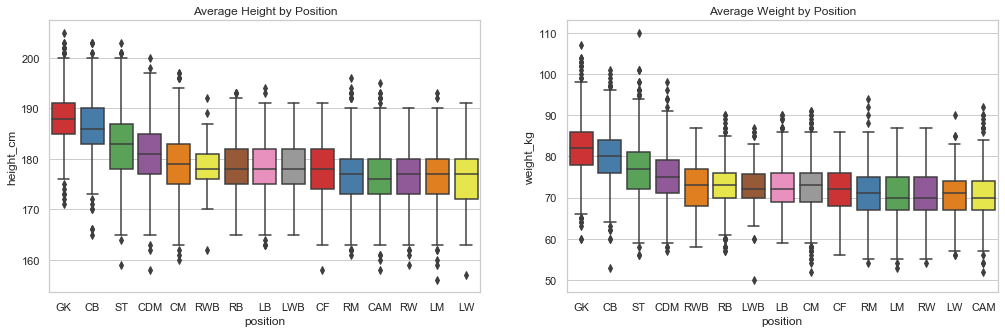

In [18]:
#plotting height and weight by position
sns.set(style="whitegrid")
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.title("Average Height by Position")
order_height = df.groupby('position').height_cm.agg('mean').sort_values(ascending=False).index
sns.boxplot(x=df["position"],y=df["height_cm"], palette="Set1", order=order_height)

plt.subplot(1,2,2)
plt.title("Average Weight by Position")
order_weight = df.groupby('position').weight_kg.agg('mean').sort_values(ascending=False).index
sns.boxplot(x=df["position"],y=df["weight_kg"], palette="Set1", order=order_weight)

plt.show()

Both weight and height follow a similar pattern, with goalkeepers, central defenders, and strikers being the tallest, and heaviest, and left/right midfielders, wingers and attacking midfielders the opposite. There is likely a high correlation between weight and height of soccer players.

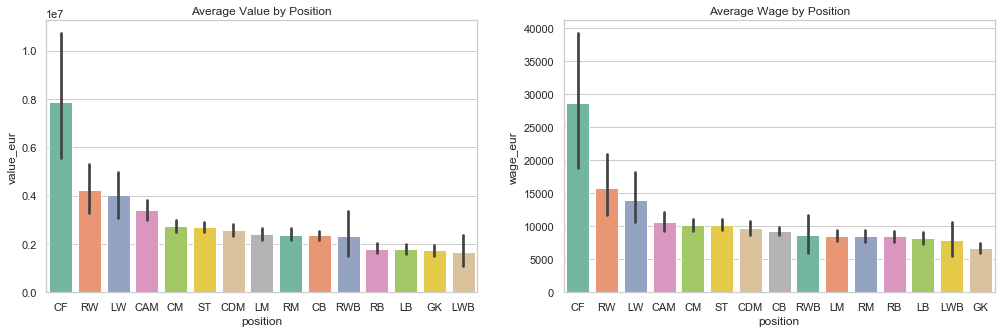

In [19]:
#plotting financials by position
sns.set(style="whitegrid")
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.title("Average Value by Position")
order_value = df.groupby('position').value_eur.agg('mean').sort_values(ascending=False).index
sns.barplot(x=df["position"],y=df["value_eur"], palette="Set2", order=order_value)

plt.subplot(1,2,2)
plt.title("Average Wage by Position")
order_wage = df.groupby('position').wage_eur.agg('mean').sort_values(ascending=False).index
sns.barplot(x=df["position"],y=df["wage_eur"], palette="Set2", order=order_wage)

plt.show()

Similarly to height and weight, more expensive players tend to have higher wages. The most expensive players making the most are generally centre-forwards and wingers, and the least expensive making the least are generally left/right defenders and goalkeepers.

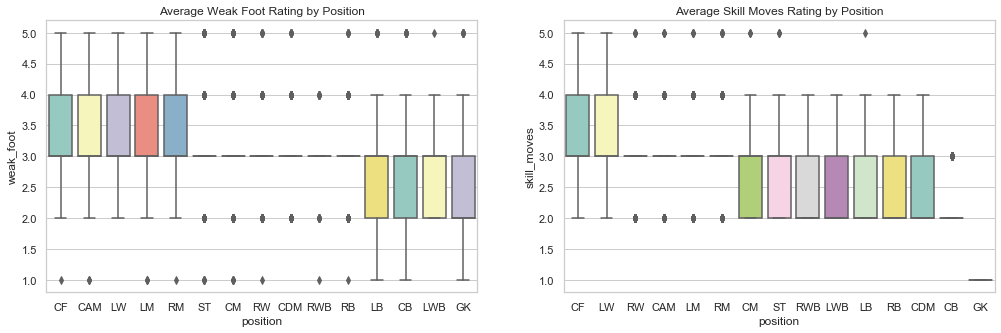

In [20]:
#plotting weak foot and skill moves by position
sns.set(style="whitegrid")
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
plt.title("Average Weak Foot Rating by Position")
order_weak = df.groupby('position').weak_foot.agg('mean').sort_values(ascending=False).index
sns.boxplot(x=df["position"],y=df["weak_foot"], palette="Set3", order=order_weak)

plt.subplot(1,2,2)
plt.title("Average Skill Moves Rating by Position")
order_skill_moves = df.groupby('position').skill_moves.agg('mean').sort_values(ascending=False).index
sns.boxplot(x=df["position"],y=df["skill_moves"], palette="Set3", order=order_skill_moves)

plt.show()

Players with a high rating of their weak foot (it is a likert scale from 1 to 5) generally tend to be centre-forwards, wingers, left/right midfielders, and central attacking midfielders. On the other hand, low rating weak-footers generally are left/central defenders, and goalkeepers. When it comes to players' skill moves, centre-forwards and left wingers tend to have the best average rating, with central defenders and goalkeepers having the lowest average ratings.

For the analysis of the particular playing attributes, it is easier to first group the abilities and find their mean by their general categories:
- attacking
- skill
- movement
- power
- mentality
- defending
- goalkeeping
- overall skill

In [21]:
#creating new columns, taking an average of attributes
df["attacking"]=df[["attacking_crossing","attacking_finishing","attacking_heading_accuracy",
                    "attacking_short_passing","attacking_volleys"]].mean(axis=1)
df["skill"]=df[["skill_dribbling","skill_curve","skill_fk_accuracy","skill_long_passing",
                "skill_ball_control"]].mean(axis=1)
df["movement"]=df[["movement_acceleration","movement_sprint_speed","movement_agility",
                   "movement_reactions","movement_balance"]].mean(axis=1)
df["power"]=df[["power_shot_power","power_jumping","power_stamina","power_strength","power_long_shots"]].mean(axis=1)
df["mentality"]=df[["mentality_aggression","mentality_interceptions","mentality_positioning",
                    "mentality_vision","mentality_penalties","mentality_composure"]].mean(axis=1)
df["defending"]=df[["defending_marking","defending_standing_tackle","defending_sliding_tackle"]].mean(axis=1)
df["goalkeeping"]=df[["goalkeeping_diving","goalkeeping_handling","goalkeeping_kicking",
                      "goalkeeping_positioning","goalkeeping_reflexes"]].mean(axis=1)
df["overall"]=df[["attacking","skill","movement","power","mentality","defending","goalkeeping"]].mean(axis=1)

In [22]:
#checking position summary means
position_summary=df[["attacking","skill","movement","power","mentality","defending",
                     "goalkeeping","overall"]].groupby(df["position"])
position_summary.mean()

,attacking,skill,movement,power,mentality,defending,goalkeeping,overall
position,,,,,,,,
CAM,58.101571,63.959511,69.726527,60.270157,56.480366,40.305701,10.437347,51.325883
CB,45.203732,44.075585,56.644276,58.825553,51.285368,65.923572,10.509867,47.495422
CDM,53.789607,57.874719,63.446067,64.901545,60.164092,65.160346,10.546629,53.697572
CF,62.454867,64.019469,72.238938,64.369912,58.374631,33.023599,10.428319,52.129962
CM,56.289649,61.741815,66.594710,63.526220,60.068095,57.247910,10.431829,53.700033
GK,15.765914,17.595187,43.302652,41.347250,25.676735,14.155697,64.033301,31.696676
LB,52.104682,55.747045,69.045587,60.191865,55.992965,63.816321,10.431773,52.475748
LM,57.510963,60.979790,72.691706,61.093422,54.046076,37.517000,10.403432,50.606056
LW,58.525397,60.984656,73.715344,60.628042,53.630952,32.527337,10.284127,50.042265


It is no surprise to see that in general, means for attacking attributes are higher for attacking players (forwards, wingers), defending attributes are higher for defenders, and goalkeeping attributes are higher for goalkeepers. Let's look at attribute groups which are less obvious.

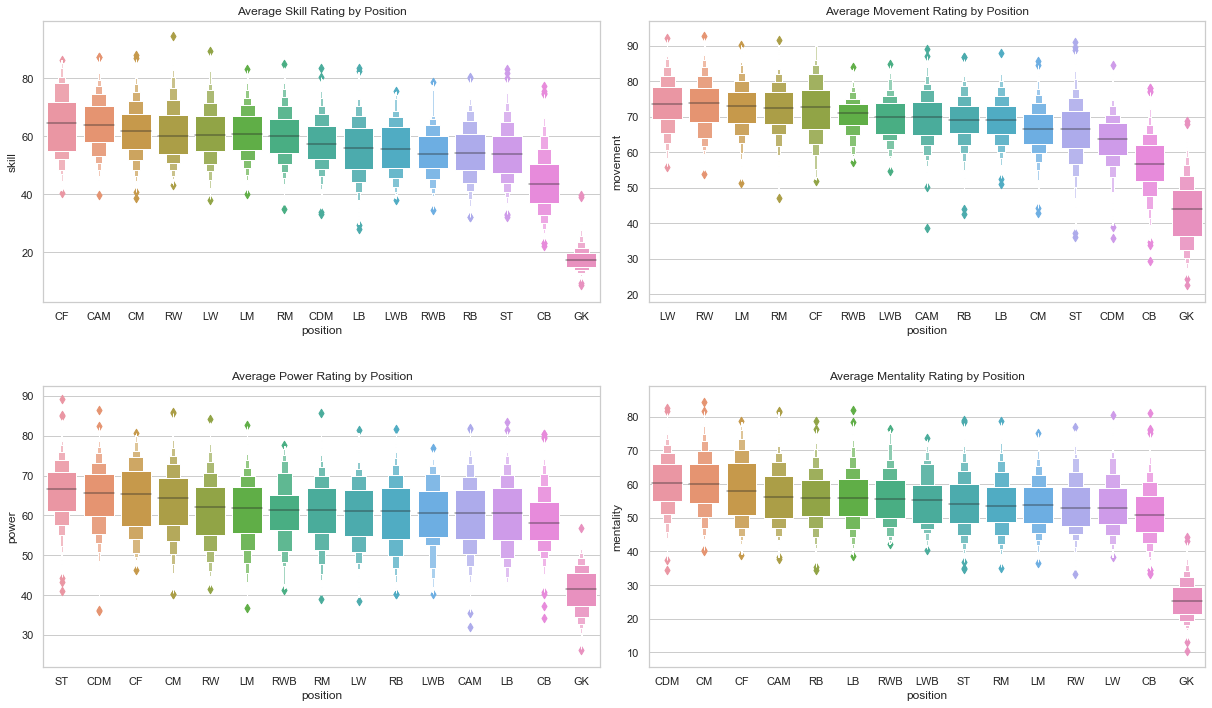

In [23]:
#plotting attribute groups by position
sns.set(style="whitegrid")
plt.figure(figsize=(17,10))

plt.subplot(2,2,1)
plt.title("Average Skill Rating by Position")
order_skill = df.groupby('position').skill.agg('mean').sort_values(ascending=False).index
sns.boxenplot(x=df["position"],y=df["skill"], order=order_skill)

plt.subplot(2,2,2)
plt.title("Average Movement Rating by Position")
order_movement = df.groupby('position').movement.agg('mean').sort_values(ascending=False).index
sns.boxenplot(x=df["position"],y=df["movement"], order=order_movement)

plt.subplot(2,2,3)
plt.title("Average Power Rating by Position")
order_power = df.groupby('position').power.agg('mean').sort_values(ascending=False).index
sns.boxenplot(x=df["position"],y=df["power"], order=order_power)

plt.subplot(2,2,4)
plt.title("Average Mentality Rating by Position")
order_mentality = df.groupby('position').mentality.agg('mean').sort_values(ascending=False).index
sns.boxenplot(x=df["position"],y=df["mentality"], order=order_mentality)

plt.tight_layout(h_pad=3.0)
plt.show()

Generally, goalkeepers and central defenders have lower mean than other positions in all attribute groups. On the opposite side of the spectrum, the results are mixed:
- skill: the players with the highest mean in the skill group are centre-forwards, attacking midfielders, and central midfielders
- movement: the players with the highest mean in the movement group are left/right midfielders and wingers, and centre-forwards
- power: the players with the highest mean in the power group are strikers, defensive midfielders, and centre-forwards
- mentality: the highest mean is registered by defensive midfielders and central midfielders

It is worth noting that the means and the standard deviations are very close to each other.

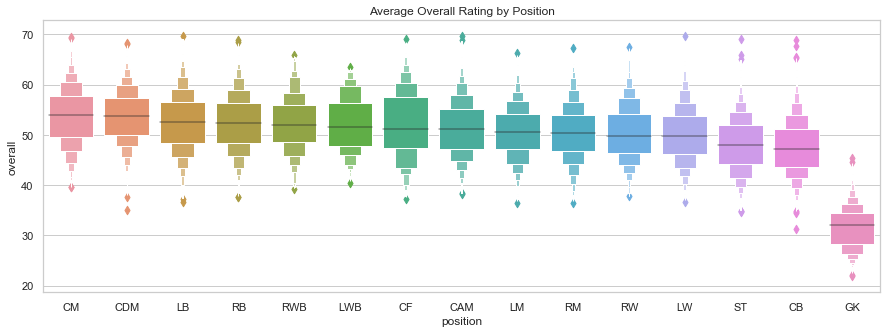

In [24]:
#plotting the overall
sns.set(style="whitegrid")
plt.figure(figsize=(15,5))
plt.title("Average Overall Rating by Position")

order_overall = df.groupby('position').overall.agg('mean').sort_values(ascending=False).index
sns.boxenplot(x=df["position"],y=df["overall"], order=order_overall)

plt.show()

Players who have high average through all abilities generally tend to be central and defensive midfielders, and left and right defenders. On the other hand, strikers, central defenders, and goalkeepers have lower average than other positions.

In [25]:
#dropping the aggregate ability columns
df.drop(["attacking","skill","movement","power","mentality","defending","goalkeeping","overall"],
        axis = 1, inplace=True)

Let's analyze the categorical variables.

In [26]:
#checking the most common number of players in specific positions
number_mode=df["team_jersey_number"].groupby(df["position"])
number_mode.agg(lambda x:x.value_counts().index[0])

position
CAM    10
CB      4
CDM     6
CF      9
CM      8
GK      1
LB      3
LM     11
LW     11
LWB     3
RB      2
RM      7
RW      7
RWB     2
ST      9
Name: team_jersey_number, dtype: int64

Because jersey numbers cannot be analyzed as continuous variables, looking at the mode makes the most sense here. For instance, from the table above we can see that goalkeepers tend to have number 1 most of the time, attacking midfielders number 10, or central defenders number 4.

In [27]:
#checking the most common nationality of players in specific positions
nationality_mode=df["nationality"].groupby(df["position"])
nationality_mode.agg(lambda x:x.value_counts().index[0])

position
CAM     Brazil
CB     England
CDM    Germany
CF       Japan
CM     England
GK     England
LB     England
LM     Germany
LW       Italy
LWB    England
RB     England
RM     England
RW      France
RWB    England
ST     England
Name: nationality, dtype: object

Using the same logic as with jersey numbers, we can, for instance, see that the most attacking midfielders are from Brazil, most central defenders are from England, and most left wingers are Italian.

In [28]:
#looking which variables are categorical
df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18278 entries, 12983 to 1810
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nationality     18278 non-null  object
 1   preferred_foot  18278 non-null  object
 2   body_type       18278 non-null  object
 3   position        18278 non-null  object
 4   att_work_rate   18278 non-null  object
 5   def_work_rate   18278 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


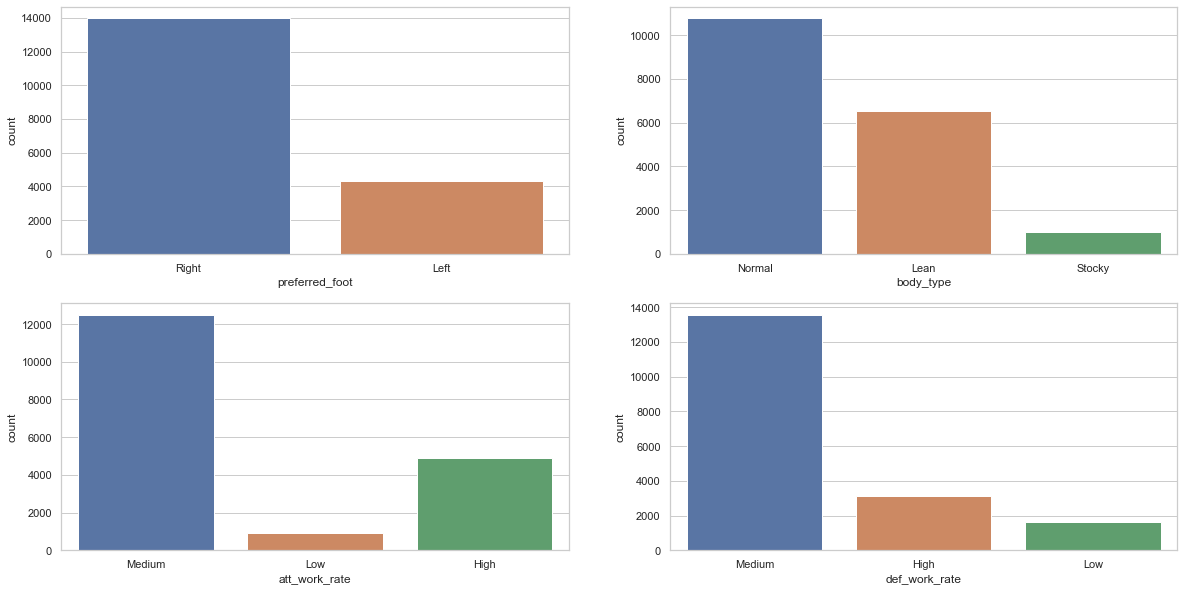

In [29]:
#creating a df of only categorical variables (except nationality and position)
cat=df[["preferred_foot","body_type","att_work_rate","def_work_rate"]]

#plotting a countplot for every categorical variable
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(cat, ax.flatten()):
    sns.countplot(cat[variable], ax=subplot)

Looking at the distribution of the physical attributes, most players are right-footed, have a normal body type, and have medium attacking and defensive workrate.

#### EDA Summary

From the EDA, we can say that on average, comparing to other positions on the pitch:
- attacking players are shorter and lighter (with the exception of strikers), have higher wages and higher value, have better weak foot and better skill moves, possess better movement skills and tend to wear numbers 7, 9, 10, 11
- defensive players tend to be taller and heavier, have lower wages and lower market value, have better defending skills, possess worse weak foot and worse skill moves, and tend to wear numbers 2, 3, 4
- central players have stronger mentality, have higher level of all skills on average, wear numbers 6, 8, and tend to be from Germany and England

### Preprocessing

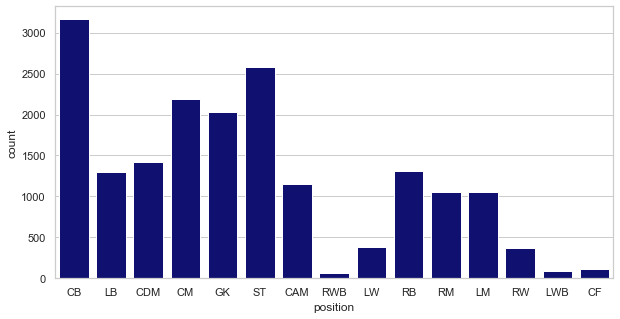

In [30]:
#checking the balance of the dataset
plt.figure(figsize=(10,5))
sns.countplot(df['position'], color="navy")
plt.show()

In [31]:
df["position"].value_counts()

CB     3162
ST     2582
CM     2193
GK     2036
CDM    1424
RB     1314
LB     1303
CAM    1146
RM     1050
LM     1049
LW      378
RW      369
CF      113
LWB      90
RWB      69
Name: position, dtype: int64

This is a prime example of an imbalanced dataset. I can keep the dataset as it is, or use upsampling and downsampling techniques. In this case, I think it is best to use SMOTE - I do not want to lose valuable data, so downsampling is not an option. SMOTE is usually very successful in dealing with inbalanced data.

In [32]:
#creating dummies
dummy_1 = pd.get_dummies(df["nationality"])
df = pd.concat([df, dummy_1], axis=1)
df.drop("nationality", axis = 1, inplace=True)

dummy_2 = pd.get_dummies(df["preferred_foot"], prefix="foot")
df = pd.concat([df, dummy_2], axis=1)
df.drop("preferred_foot", axis = 1, inplace=True)

dummy_3 = pd.get_dummies(df["body_type"], prefix="body")
df = pd.concat([df, dummy_3], axis=1)
df.drop("body_type", axis = 1, inplace=True)

dummy_4 = pd.get_dummies(df["team_jersey_number"], prefix="number")
df = pd.concat([df, dummy_4], axis=1)
df.drop("team_jersey_number", axis = 1, inplace=True)

dummy_5 = pd.get_dummies(df["att_work_rate"], prefix="att_work")
df = pd.concat([df, dummy_5], axis=1)
df.drop("att_work_rate", axis = 1, inplace=True)

dummy_6 = pd.get_dummies(df["def_work_rate"], prefix="def_work")
df = pd.concat([df, dummy_6], axis=1)
df.drop("def_work_rate", axis = 1, inplace=True)

In [33]:
#importing preprocessing packages
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#defining x and y
target = df["position"]
df.drop(["position"], axis=1, inplace=True)
x=df
y=target

#using label encoder to convert str->int and saving the mappings into a dictionary
label_encoder = preprocessing.LabelEncoder().fit(y)
name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
y = label_encoder.transform(y)

#splitting the sample
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [34]:
#resampling using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

print("Original sample shape:", x_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original sample shape: (14622, 314) (14622,)
SMOTE sample shape: (38085, 314) (38085,)


Using standard parameters for SMOTE has resulted in increasing the number of observations. Let's look at it graphically.

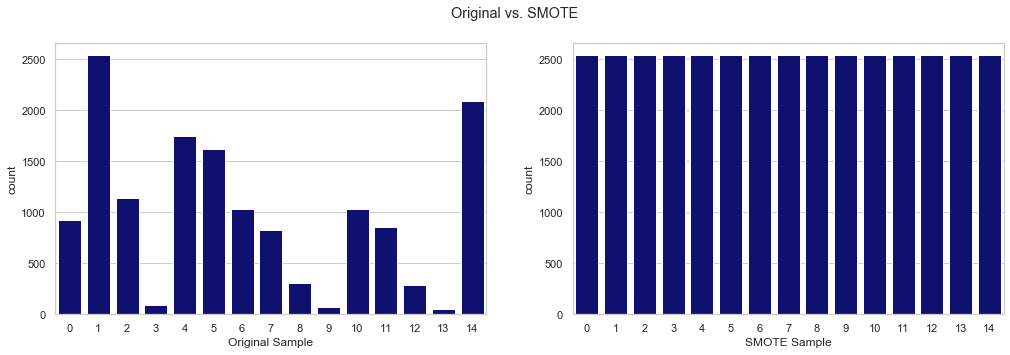

In [35]:
#comparing distributions
sns.set(style="whitegrid")
plt.figure(figsize=(17,5))

plt.subplot(1,2,1)
ax = sns.countplot(y_train, color="navy")
ax.set(xlabel="Original Sample")

plt.subplot(1,2,2)
ax = sns.countplot(y_train_sm, color="navy")
ax.set(xlabel="SMOTE Sample")

plt.suptitle("Original vs. SMOTE")
plt.show()

As we can see, SMOTE has increased the number of observations by creating synthetic ones based on nearest neighbours.

The metric I have chosen for measuring the accuracy of the classification model is the accuracy score. In other words, the score will tell me the percentage the model attributed the correct class to an observation (in this case, whether the model predicted the correct posittion of a player).

As my baseline model, I will use a dummy clasifier returning predictions by following the training set’s class distribution.

In [36]:
#baseline
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

baseline = DummyClassifier(strategy='stratified', random_state=1)
baseline.fit(x_train_sm,y_train_sm)
print("The accuracy score of the baseline on the test data is:", accuracy_score(y_test,baseline.predict(x_test)))

The accuracy score of the baseline on the test data is: 0.06838074398249452


The accuracy score displayed is practically chance. The tree could have ended up with 15 different outcomes (playing positions). Relying only on chance, i.e. picking a random outcome for any observation, the accuracy would approximately be 6.66 percent.

There are 3 models I will try to improve the baseline's accuracy score:
- Decision Tree: this simple algorithm is ideal for multiclass prediction
- Random Forest: essentially creates multiple trees, and averages their results
- Gradient Boosting: weak learners improve performance gradually, and the key is the optimization of a loss function, allowing for the model to improve

In [37]:
#releasing memory
import gc
gc.collect()

31827

## DEVELOP

In [38]:
#accuracy score of decision tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree

dt = tree.DecisionTreeClassifier(splitter="best",class_weight="balanced",random_state=1)
dt.fit(x_train_sm,y_train_sm)
print("The accuracy score of the decision tree on the test data is:", accuracy_score(y_test,dt.predict(x_test)))

The accuracy score of the decision tree on the test data is: 0.600382932166302


In [39]:
#accuracy score of random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=210,max_depth=50,criterion='gini',random_state=1)
rf.fit(x_train_sm,y_train_sm)
print("The accuracy score of the random forest on the test data is:", accuracy_score(y_test,rf.predict(x_test)))

The accuracy score of the random forest on the test data is: 0.7210065645514223


In [40]:
#accuracy score of gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=160, max_depth=6, random_state=1)  
gb.fit(x_train_sm,y_train_sm)
gb_pred=gb.predict(x_test)
print("The accuracy score of the gradient boosting on the test data is:", accuracy_score(y_test,gb_pred))

The accuracy score of the gradient boosting on the test data is: 0.725382932166302


After a bit of hyperparameter tuning, both gradient boosting and random forest perform approximately the same, with gradient boosting performing a bit better on the test data. I will save the model, save the predictions, and analyze which features are the most important for the prediction.

## DEPLOY

In [41]:
#saving the gradient boosting model
import joblib
joblib_file = "GB_soccer_model.pkl"
joblib.dump(gb, joblib_file)

#loading the saved model
model = joblib.load("GB_soccer_model.pkl")
print("The model used is:", model)

The model used is: GradientBoostingClassifier(max_depth=6, n_estimators=160, random_state=1)


In [42]:
#scoring the test dataset
soccer_predictions = model.predict(x_test)

#saving the predictions
np.savetxt('soccer_predictions.csv', soccer_predictions, delimiter=',')

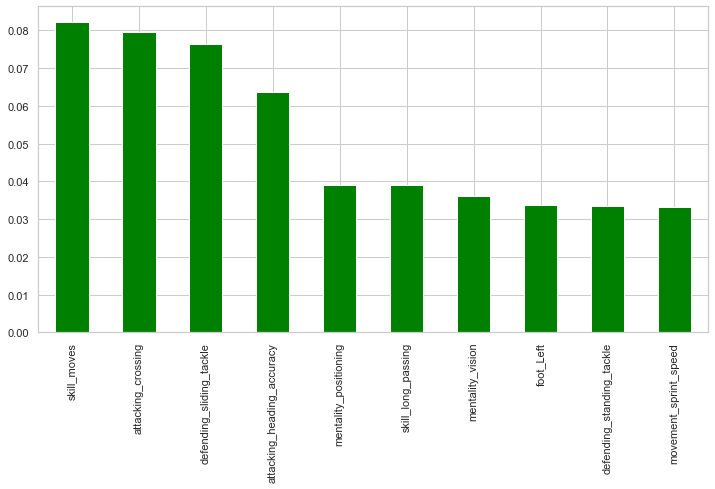

In [43]:
#showing feature importances
importances = pd.Series(model.feature_importances_, index=df.columns)
importances.nlargest(10).plot(kind='bar', figsize=(12,6), color="green")
plt.show()

#saving feature importances
np.savetxt('soccer_importances.csv', importances, delimiter=',')

## DISCUSSION

To better understand the where the model performs well and where it makes mistakes, plotting the confusion matrix might provide some answers.

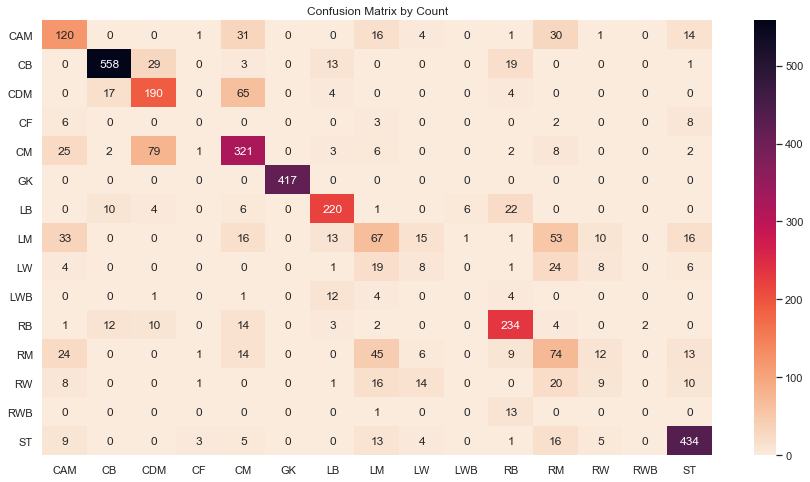

In [44]:
#plotting confusion matrix (by count)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,gb_pred)

plt.figure(figsize=(15,8))
sns.heatmap(cm,annot=True, cmap=sns.cm.rocket_r, fmt='g', yticklabels=name_mapping, xticklabels=name_mapping)
plt.yticks(rotation=0)
plt.title("Confusion Matrix by Count")
plt.show()

Although this heatmap provides some information, it is not the best for the test dataset, as it is unbalanced. Therefore, the colours and counts do not provide much insight. Let's look at a heatmap that converts these absolute values into percentages.

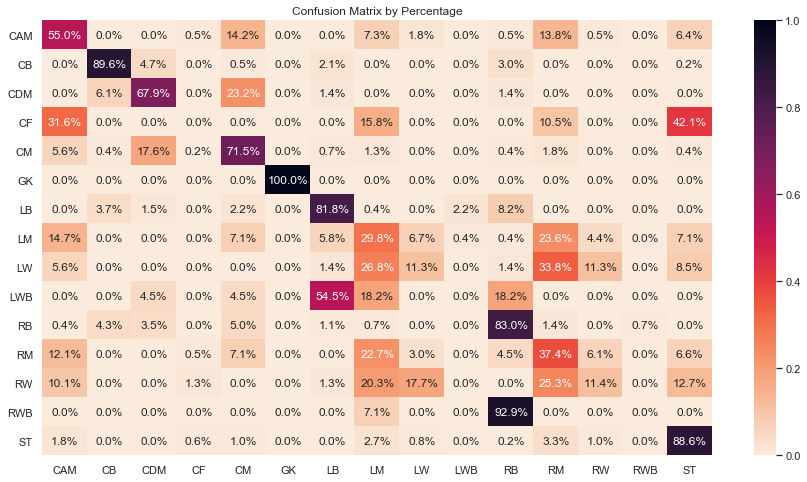

In [45]:
#plotting confusion matrix (by percentage)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15,8))
ax = sns.heatmap(cmn,annot=True, cmap=sns.cm.rocket_r,fmt='.1%', yticklabels=name_mapping, xticklabels=name_mapping)
plt.yticks(rotation=0)
plt.title("Confusion Matrix by Percentage")
plt.show()

While the predicted values of some positions match their true values very well (goalkeeper, left/right/central defender, striker), other predicted values do not match the true values at all. I would like to analyze why that might be the case:
- a lot of positions share the same area of the pitch, and therefore their attributes might be very similar: for instance, centre-forwards and strikers, or right/left defenders and right/left wing-backs
- in case of left/right midfielders/wingers, in addition to operating in the same areas of the pitch, their roles are mirrored, and what side of the pitch they play depends on the instructions, and their role: for instance, a player can be a winger or an inside forward, depending on which foot they prefer to use
- some positions on the pitch are not much about the positions, but also specific roles: for example, attacking midfielders can often free-roam around the attacking areas of the pitch, therefore they share common traits with wingers, or strikers

## SUMMARY

To sum up, I developed a model that is predicting soccer players' position based on their ability scores, financial information, and other features. After performing the exploratory data analysis, I fitted three models and compared their accuracy scores,  comparing how well the models performed comparing to the baseline model, and also each other. The model performing the best was the gradient boosting model. I saved the model and saved the results of the prediction in a csv file. I also included the analysis of feature importances, and saved it in a separate file. Finally, I analyzed the accuracy of the model using a confusion matrix.

Future iterations of this type of analysis might consider analyzing general roles of players (for instance, based on the same instructions for multiple positions, such as right midfielder/winger, or centre-forward/striker). As mentioned in the discussion section, some positions are just too similar to each other, and the features used in the model alone are not able to distinguish between them accurately and consistently enough.